## Practical session 2. Penguins!


Kristen Gorman visited 3 Antarctic islands of the Palmer Archipelago (Torgersen, Biscoe, and Dream) and collected data about three penguin species (Adelie, Gentoo, and Chinstrap). You can find the full dataset in [their github page](https://allisonhorst.github.io/palmerpenguins/). Today we will use a modified subset of the data (`penguins.csv`) to infer sex and anatomic relationships between the penguins. We will start by loading the required libraries for the notebook and loading the data

In [1]:
import numpy as np # numpy is the standard numeric libray
import scipy.stats as ss # scipy is the scientific library, the stats module contains different functions
import matplotlib.pyplot as plt # matplotlib is the standard plotting library
import seaborn as sns # library for statistical plotting
import pymc as pm # library for Bayesian MCMC inference
import arviz as az # library to analyze and plot Bayesian results


### Loading data
import pandas as pd # pandas is a library to manipulate dataframes
penguin_df = pd.read_csv('penguins.csv')
display(penguin_df)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181,3750,male,2007
1,Adelie,Torgersen,39.5,17.4,186,3800,female,2007
2,Adelie,Torgersen,40.3,18.0,195,3250,female,2007
3,Adelie,Torgersen,36.7,19.3,193,3450,female,2007
4,Adelie,Torgersen,39.3,20.6,190,3650,male,2007
...,...,...,...,...,...,...,...,...
337,Chinstrap,Dream,55.8,19.8,207,4000,male,2009
338,Chinstrap,Dream,43.5,18.1,202,3400,female,2009
339,Chinstrap,Dream,49.6,18.2,193,3775,male,2009
340,Chinstrap,Dream,50.8,19.0,210,4100,male,2009


### Part 1: Calculating proportions

In the 2007, the dataset shows that Kirsten's team observed more female than male Adelie penguinin the island of Togersen.

**Question 1.1** We want to evaluate how confident can we be that in that year there were more female than male penguins in the island. To solve this use pyMC to generate a posterior distribution for the ratio $f$ of females in the population.

In [2]:
## Loading data

f_Adelie = penguin_df['species']=='Adelie' # mask of entries for Adelie penguins
f_Torgersen = penguin_df['island']=='Torgersen' # mask of entries for Torgersen island
f_2007 = penguin_df['year']==2007 # mask for entries from 2007
penguin_subset_df = penguin_df[f_Adelie & f_Torgersen & f_2007] # subset used in the question


display(penguin_subset_df)
N_penguins = penguin_subset_df.shape[0]
N_female = np.sum(penguin_subset_df['sex']=='female')
print("In 2007 {} Adelie penguins where observed in Torgersen, from which {} were female".format(N_penguins,N_female))


# To genreate the MCMC model you can use the same steps that we used in the previous notebook.
# Note that the parameter we are trying to infer is now continuous
with pm.Model() as Pea_Model:
    f = pm.TruncatedNormal("f",mu=0.5,sigma = 0.5,lower = 0, upper=1)# We could also use a uniform distribution, play with different values to see how it affects the result!
    f_likelihood = pm.Binomial("female", n=N_penguins, p = f, observed = N_female)# Write the binomial likelihood 
    mcmc_sample = pm.sample(4000, chains = 2, return_inferencedata = True)    
    
az.summary(mcmc_sample) # summary of MCMC statistics



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181,3750,male,2007
1,Adelie,Torgersen,39.5,17.4,186,3800,female,2007
2,Adelie,Torgersen,40.3,18.0,195,3250,female,2007
3,Adelie,Torgersen,36.7,19.3,193,3450,female,2007
4,Adelie,Torgersen,39.3,20.6,190,3650,male,2007
5,Adelie,Torgersen,38.9,17.8,181,3625,female,2007
6,Adelie,Torgersen,39.2,19.6,195,4675,male,2007
7,Adelie,Torgersen,34.1,18.1,193,3475,female,2007
8,Adelie,Torgersen,42.0,20.2,190,4250,female,2007
9,Adelie,Torgersen,37.8,17.1,186,3300,female,2007


Initializing NUTS using jitter+adapt_diag...


In 2007 19 Adelie penguins where observed in Torgersen, from which 13 were female


Multiprocess sampling (2 chains in 2 jobs)
NUTS: [f]


Output()

Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
f,0.656,0.1,0.472,0.841,0.002,0.001,3485.0,4867.0,1.0


**Question 1.2** Using the posterior distribution you can evaluate the previous question in three different ways: 1) Can we reject the hypothesis that f=1/2? 2) Can we accept the hypothesis that f=1/2? 3) Is the number of females greater than the number of males?. Answer the three questions separately

The 94% HDI is [0.47232719 0.8409867 ]
Credibility of the ROPE for f=0.5 is 0.125
Credibility of female>male is 0.933625


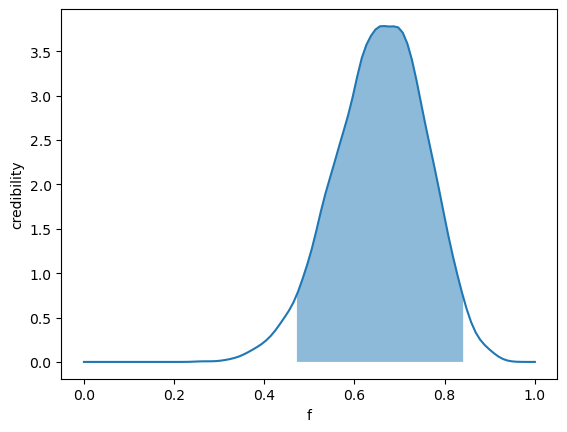

In [10]:
## Remember that you can evalute the hdi using arviz.
hdi = az.hdi(mcmc_sample,var_names=["f"], hdi_prob = 0.94) # 94% credibility interval
hdi_numpy = hdi['f'].to_numpy() # you can extract the hdi as numpy arrays as well
print('The 94% HDI is',hdi_numpy)

## You can access all the values of the trace (posterior) as
posteriorf = mcmc_sample.posterior.f # extract the values of N for the posterior distribution
posteriorf_all = posteriorf.values.ravel() # flatten the array to gather all the chains in a single array
## We can also plot the posterior. In the previous notebook we used a histogram, we can also use a KDE
kde = ss.gaussian_kde(posteriorf_all)
f_values = np.linspace(0,1,100)
plt.plot(f_values,kde(f_values),'-') # plot KDE
f_values_hdi = np.linspace(hdi_numpy[0],hdi_numpy[1],100)
plt.fill_between(f_values_hdi,kde(f_values_hdi),alpha=0.5) # shade the KDE under the 95% HDR
plt.xlabel('f')
plt.ylabel('credibility')


###### Accept f=0.5
N_underROPE = np.sum(posteriorf_all<0.45)
N_aboveROPE = np.sum(posteriorf_all>0.55)
N_total = np.shape(posteriorf_all)[0]
credibility = 1-(N_underROPE + N_aboveROPE)/N_total
print("Credibility of the ROPE for f=0.5 is", credibility)

##### credibility female > male
N_morefemale = np.sum(posteriorf_all>0.5)
credibility = N_morefemale/N_total
print("Credibility of female>male is", credibility)

#posteriorf_all = np.sum(posteriorf_all[posteriorf_all])





#### Hierarchical modelling
In our analysis of penguin populations, we have focused on individual islands without considering additional data from neighboring islands. Given that the fraction $f$ of females within each island's penguin population is likely to be similar across islands in the same year, we can leverage this information to refine our inference through a hierarchical model. Hierarchical modeling allows us to treat each island's $f$ as originating from a shared distribution, acknowledging that while each island's fraction may vary, these variations are part of a coherent pattern influenced by broader factors.

This does not imply a single joint distribution for the number of females in the archipelago rather enables us to infer a specific posterior distribution of $f$ for each island, under the assumption that these distributions are related rather than completely independent. Essentially, hierarchical models connect the prior distributions for $f$ across islands, reflecting our belief in a structured, not random, variation among them.

Therefore, the parameters we want to infer are: 1) The credibility distribution of $f$ for each island, and 2) The shared parameters among the islands (hyperprior). In particular, the credibility for the cross-island average $\mu$, and the cross-island standard deviation $\sigma$ 

In [ ]:
f_Adelie = penguin_df['species']=='Adelie' # mask of entries for Adelie penguins
f_2007 = penguin_df['year']==2007 # mask for entries from 2007

f_Torgersen = penguin_df['island']=='Torgersen' # mask of entries for Torgersen island
f_Biscoe = penguin_df['island']=='Biscoe' # mask of entries for Torgersen island
f_Dream = penguin_df['island']=='Dream' # mask of entries for Torgersen island
f_female = penguin_df['sex']=='female' # mask of entries for Torgersen island

N_Torgersen = np.sum(f_Adelie & f_2007 & f_Torgersen) # Number of Torgersen penguins observed
N_Torgersen_female = np.sum(f_Adelie & f_2007 & f_Torgersen & f_female) # Number of female Torgersen penguins observed

N_Biscoe = np.sum(f_Adelie & f_2007 & f_Biscoe) # Number of Biscoe penguins observed
N_Biscoe_female = np.sum(f_Adelie & f_2007 & f_Biscoe & f_female) # Number of female Biscoe penguins observed

N_Dream = np.sum(f_Adelie & f_2007 & f_Dream) # Number of Dream penguins observed
N_Dream_female = np.sum(f_Adelie & f_2007 & f_Dream & f_female) # Number of female Dream penguins observed

with pm.Model() as model:
    
    # cross-island parameters
    mu = pm.Uniform('mu', lower=0, upper =1) #cross-island mean f, the value is between 0,1 using an uninformative prior
    sigma = pm.HalfNormal('sigma', sigma = 0.05) #cross-island std f, we don't expect the "f" of each island to be very different among each other
    
    # island-specific parameters
    f_Torgersen = pm.TruncatedNormal("f_Torgersen",mu = mu, sigma = sigma, lower = 0, upper = 1) # The prior is taken from the shared prior
    f_Biscoe = pm.TruncatedNormal("f_Biscoe",mu = mu, sigma = sigma, lower = 0, upper = 1) # The prior is taken from the shared prior
    f_Dream = pm.TruncatedNormal("f_Dream",mu = mu, sigma = sigma, lower = 0, upper = 1) # The prior is taken from the shared prior
    
    #The likelihood will be the product of all the observations for each island. If you define 3 likelihoods, pymc multiplies them for you!!
    lkl_Torgersen = pm.Binomial("lkl_Torgersen", n=N_Torgersen, p = f_Torgersen, observed = N_Torgersen_female)# Write the binomial likelihood 
    lkl_Biscoe = pm.Binomial("lkl_Biscoe", n=N_Biscoe, p = f_Biscoe, observed = N_Biscoe_female)# Write the binomial likelihood 
    lkl_Dream = pm.Binomial("lkl_Dream", n=N_Dream, p = f_Dream, observed = N_Dream_female)# Write the binomial likelihood 
    # 
    mcmc_sample_hierarchical = pm.sample(40000, chains = 4, return_inferencedata = True)    

az.summary(mcmc_sample_hierarchical) # summary of MCMC statistics

    


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma, f_Torgersen, f_Biscoe, f_Dream]


Output()

Sampling 4 chains for 1_000 tune and 40_000 draw iterations (4_000 + 160_000 draws total) took 16 seconds.
There were 14959 divergences after tuning. Increase `target_accept` or reparameterize.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
mu,0.527,0.078,0.374,0.666,0.001,0.001,3948.0,2902.0,1.0
sigma,0.047,0.030,0.007,0.100,0.001,0.000,908.0,348.0,1.0
f_Torgersen,0.552,0.081,0.400,0.704,0.001,0.001,4988.0,5814.0,1.0
f_Biscoe,0.505,0.088,0.337,0.667,0.001,0.001,3517.0,1669.0,1.0
f_Dream,0.523,0.078,0.376,0.667,0.001,0.001,3729.0,2712.0,1.0


The 94% HDI is [0.40362683 0.70073127]
Credibility of the ROPE for f=0.5 is 0.39639375
Credibility of female>male is 0.7505375


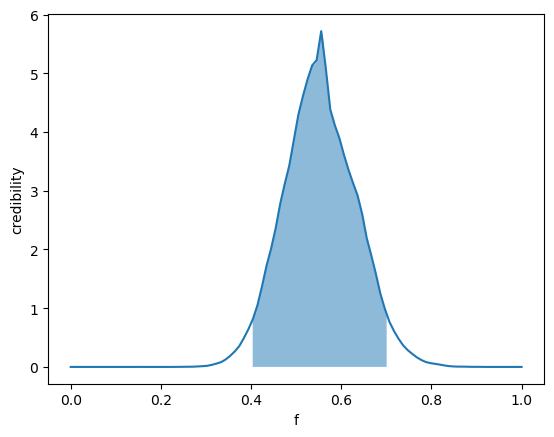

In [5]:
## Remember that you can evalute the hdi using arviz.
hdi = az.hdi(mcmc_sample_hierarchical,var_names=["f_Torgersen"], hdi_prob = 0.94) # 94% credibility interval
hdi_numpy = hdi['f_Torgersen'].to_numpy() # you can extract the hdi as numpy arrays as well
print('The 94% HDI is',hdi_numpy)

## You can access all the values of the trace (posterior) as
posteriorf = mcmc_sample_hierarchical.posterior.f_Torgersen # extract the values of N for the posterior distribution
posteriorf_all = posteriorf.values.ravel() # flatten the array to gather all the chains in a single array
## We can also plot the posterior. In the previous notebook we used a histogram, we can also use a KDE
kde = ss.gaussian_kde(posteriorf_all)
f_values = np.linspace(0,1,100)
plt.plot(f_values,kde(f_values),'-') # plot KDE
f_values_hdi = np.linspace(hdi_numpy[0],hdi_numpy[1],100)
plt.fill_between(f_values_hdi,kde(f_values_hdi),alpha=0.5) # shade the KDE under the 95% HDR
plt.xlabel('f')
plt.ylabel('credibility')


###### Accept f=0.5
N_underROPE = np.sum(posteriorf_all<0.45)
N_aboveROPE = np.sum(posteriorf_all>0.55)
N_total = np.shape(posteriorf_all)[0]
credibility = 1-(N_underROPE + N_aboveROPE)/N_total
print("Credibility of the ROPE for f=0.5 is", credibility)

##### credibility female > male
N_morefemale = np.sum(posteriorf_all>0.5)
credibility = N_morefemale/N_total
print("Credibility of female>male is", credibility)

#posteriorf_all = np.sum(posteriorf_all[posteriorf_all])

### Part 2: Linear Regression


In this part we will use the same Bayesian workflow to study the linear relationship between two variables. This can be done in a straightforward way, since the flexibility of the Bayesian approach enables us to adapt our analysis to various models of likelihood. By incorporating our understanding and beliefs about the possible underlying relationships within the data, we can use the Bayesian approach to constrain our predictions. 

**Question 2.1** For each penguin, create a scatter plot with bill length on one axis and flipper length on the other. Then, visually inspect the plot to determine if there is a correlation between these two measurements. Hint: since your data is in a Pandas dataframe you can use seaborn's [`scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html) function

<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

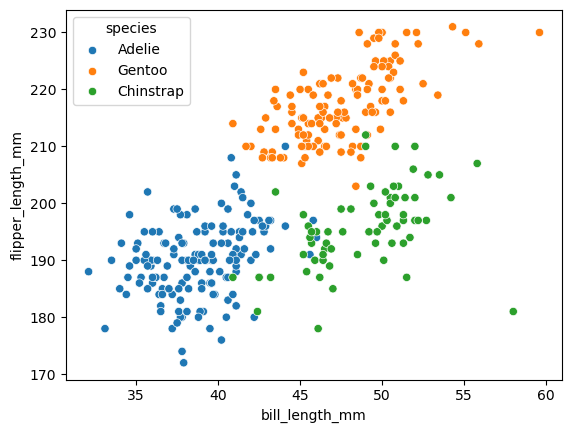

In [6]:
sns.scatterplot(penguin_df,x='bill_length_mm',y='flipper_length_mm',hue='species')

In order to fit a linear regression, we need to write our credibility for the linear relationship in the data. One possible way is to assume that for each species the mean flipper length is a linear function of the bill_length $\mu_{flipper} = a\cdot $ bill_length $+ b$. In addition we can assume that the observed flipper_length is normally distributed around the corresponding $\mu_{flipper}$ with a standard deviation $\sigma$. And alternative way of writing this relationship that you can find in books is $flipper \sim \mathcal{N}(a\cdot bill+b,\sigma)$.

**Question 2.2** The 3 parameters in our model are $a$, $b$ and $\sigma$. Before conducting any analysis, What values do you think would fit the data well?

**Question 2.3** Fill the gaps in the following code to perform the linear regression using Bayesian inference for the penguins of Torgersen island. 


In [7]:
f_Torgersen = penguin_df['island']=='Torgersen' # mask of entries for Torgersen island

flipper_length_Torgersen = penguin_df[f_Torgersen]['flipper_length_mm']
bill_length_Torgersen = penguin_df[f_Torgersen]['bill_length_mm']

with pm.Model() as model:
    
    # you can find a,b,sigma ranges by visual exploration of the data. Some times the analysis is 
    # easier if the daya is z-score normalized 
    a = pm.Uniform('a',-20,20)
    b = pm.Uniform('b',0,500)
    sigma = pm.Uniform('sigma',5,20)
    
    # expected mean as a function of bill_length (it could be any non-linear function as well!)
    mu_flipper = a*bill_length_Torgersen + b
    
    likelihood = pm.Normal("lkl", mu = mu_flipper, sigma = sigma, observed = flipper_length_Torgersen)# Write the binomial likelihood 
    # 
    mcmc_sample_hierarchical = pm.sample(10000, chains = 5, return_inferencedata = True)
    map = pm.find_MAP() # this tme we will also store the MAP


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (5 chains in 4 jobs)
NUTS: [a, b, sigma]


Output()

Sampling 5 chains for 1_000 tune and 10_000 draw iterations (5_000 + 50_000 draws total) took 24 seconds.


Output()

In [8]:
print("MAP: a={},  b={},  sigma={},".format(map['a'],map['b'],map['sigma']))
az.summary(mcmc_sample_hierarchical)

MAP: a=0.7940392492903854,  b=160.26747696472782,  sigma=5.693961421282521,


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,0.795,0.282,0.271,1.344,0.003,0.002,10655.0,13688.0,1.0
b,160.230,10.992,139.875,181.794,0.107,0.075,10653.0,13678.0,1.0
sigma,6.012,0.587,5.003,7.019,0.005,0.003,13021.0,9647.0,1.0


**Question 2.4** Use the results to infer if there is a linear relationship. 

**Question 2.5** Posterior predictive checks. The posterior distributions contain values of the parameters with highest credibility but it could be that those "best" paramerters, are still not good approximations of the data. For this reason is good to perform posterior predictive checks. In our case we can plot the following on top of the original data:

1) The linear fit predicted by the MAP of the posterior distribution. 
2) We had to assume that the data were normally distributed along our prediction of $\mu_{flipper}$. In order to check this, we can generate synthetic data given by the posterior and compare if the results qualitative resemble the original data. In some texts this posterior predictive check is denoted as $P(\,\widetilde{data}\,|data)$.

5


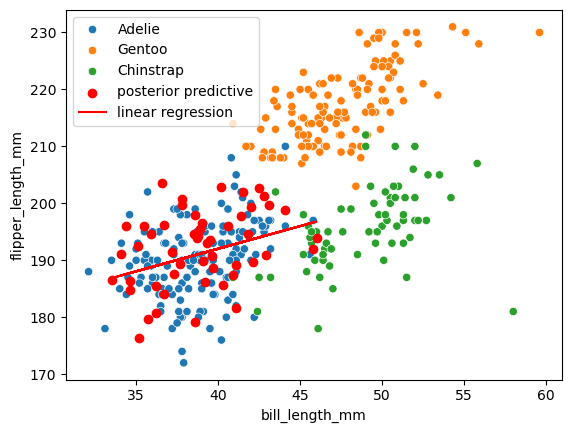

In [9]:
print(5)
ax = sns.scatterplot(penguin_df,x='bill_length_mm',y='flipper_length_mm',hue='species')
ax.scatter(bill_length_Torgersen,
            bill_length_Torgersen*map['a']+map['b']+np.random.normal(scale = map['sigma'],size = len(bill_length_Torgersen)),
            c = 'red', label = 'posterior predictive')
ax.plot(bill_length_Torgersen,
            bill_length_Torgersen*map['a']+map['b'],
            'r-',label='linear regression')
ax.legend()
plt.show()

